# Importing Libraries/Reading in Data

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
df = pd.read_csv('Data/Prem-Tomorrowland_posts_11-16.csv')
df.head()

,title,selftext,subreddit,created_utc
0,Genreverse,"Hi everyone, \n\nHere at Genreverse our ultima...",Tomorrowland,1637031457
1,Tomorrowland and it's bass line-up,So obviously Tomorrowland has always had a gre...,Tomorrowland,1637002849
2,Hand crafts 2021,NaN,Tomorrowland,1636935255
3,Winter TML lodging,hello! I have the 4 day pass without lodging a...,Tomorrowland,1636922669
4,Was Tomorrowland around the world 2020 a speci...,NaN,Tomorrowland,1636904090


In [35]:
df.shape

(2000, 4)

---

# Cleaning/Preprocessing/EDA

### Cleaning/Creating Length Columns

In [36]:
df.isnull().sum()

title            0
selftext       885
subreddit        0
created_utc      0
dtype: int64

In [37]:
df[(df['selftext'].isnull()) & (df['subreddit'] == 'PremierLeague')].shape

(434, 4)

In [38]:
df[(df['selftext'].isnull()) & (df['subreddit'] == 'Tomorrowland')].shape
# almost even split of null values in selftext column between Tomorrowland and Premier League Reddits

(451, 4)

In [39]:
df[df['selftext'] == '']

,title,selftext,subreddit,created_utc


In [40]:
df['selftext'].fillna('', inplace=True)  # focusing on titles in this notebook, so not worried about these nulls

In [41]:
length = []
for i in df['title']:
    length.append(len(i))
    
df['title_length'] = length

In [42]:
num_words = []
for i in df['title']:
    num_words.append(len(i.split()))

df['title_word_count'] = num_words

In [43]:
df.head()

,title,selftext,subreddit,created_utc,title_length,title_word_count
0,Genreverse,"Hi everyone, \n\nHere at Genreverse our ultima...",Tomorrowland,1637031457,10,1
1,Tomorrowland and it's bass line-up,So obviously Tomorrowland has always had a gre...,Tomorrowland,1637002849,34,5
2,Hand crafts 2021,,Tomorrowland,1636935255,16,3
3,Winter TML lodging,hello! I have the 4 day pass without lodging a...,Tomorrowland,1636922669,18,3
4,Was Tomorrowland around the world 2020 a speci...,,Tomorrowland,1636904090,60,9


In [44]:
df.groupby('subreddit').mean()[['title_length', 'title_word_count']]

,title_length,title_word_count
subreddit,,
PremierLeague,61.019,10.807
Tomorrowland,47.623,8.171


**Premier Leauge posts tend to have longer titles than Tomorrowland posts on average.**

In [45]:
cvec = CountVectorizer(stop_words='english')
cvec.fit(df['title'])
title_cvec = cvec.transform(df['title'])

In [46]:
title_words = pd.DataFrame(title_cvec.todense(), columns=cvec.get_feature_names())
title_words

,00,000,007,00a,05,06,07,08,09,10,...,zrfj,ខភ,គជ,𝗕𝗼𝘂𝗻𝗱𝗮𝗿𝗶𝗲𝘀,𝗕𝗿𝗲𝗮𝗸𝗶𝗻𝗴,𝗤𝗼𝗻𝘁𝗶𝗻𝗲𝗻𝘁,𝗧𝗵𝗲,𝗽𝗼𝘀𝘁𝗽𝗼𝗻𝗲𝗱,𝘁𝗼,𝟮𝟬𝟮𝟮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
title_words['which_sub'] = df['subreddit']

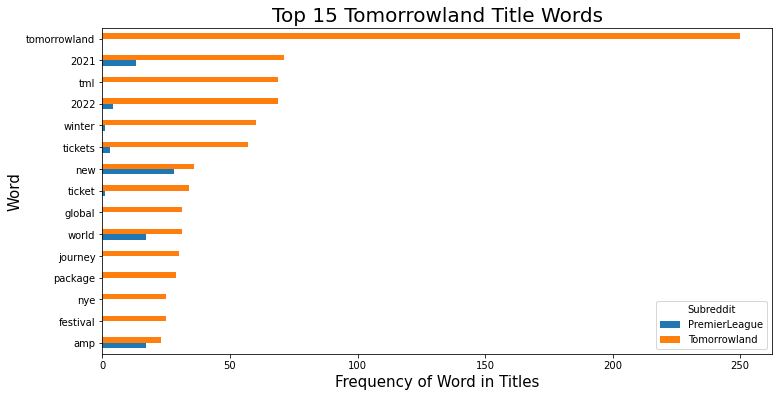

In [48]:
ax = title_words.groupby('which_sub').sum().T.sort_values('Tomorrowland', ascending=False).head(15).sort_values('Tomorrowland').plot(kind='barh', figsize=(12,6))
plt.title('Top 15 Tomorrowland Title Words', size=20)
plt.xlabel('Frequency of Word in Titles', size=15)
plt.ylabel('Word', size=15)
ax.legend(title='Subreddit', labels=("PremierLeague","Tomorrowland"))
#plt.savefig('./Visuals/top15tomo_title_words.png', bbox_inches='tight');
plt.show();

*Of the top words, not very many seem to similar so hopefully the model should be able to predict subreddits with high accuracy*

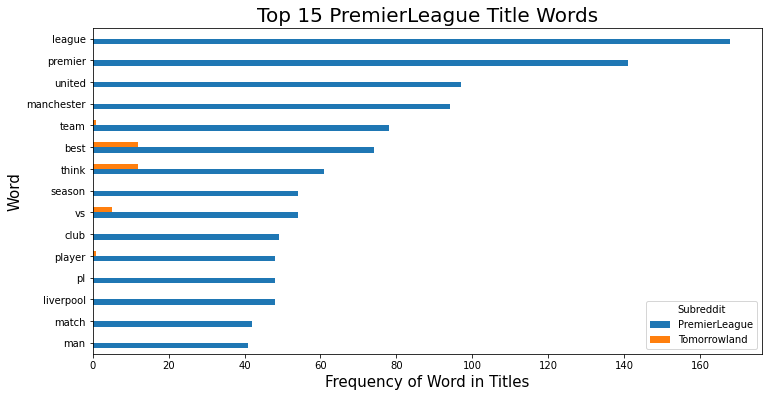

In [49]:
ax = title_words.groupby('which_sub').sum().T.sort_values('PremierLeague', ascending=False).head(15).sort_values('PremierLeague').plot(kind='barh', figsize=(12,6))
plt.title('Top 15 PremierLeague Title Words', size=20)
plt.xlabel('Frequency of Word in Titles', size=15)
plt.ylabel('Word', size=15)
ax.legend(title='Subreddit', labels=("PremierLeague","Tomorrowland"))
#plt.savefig('./Visuals/top15prem_title_words.png', bbox_inches='tight');
plt.show();

*Of the top words, not very many seem to similar so hopefully the model should be able to predict subreddits with high accuracy*

In [50]:
titles_and_words = pd.merge(df, title_words, on=df.index)
titles_and_words.drop(columns='key_0', inplace=True)

In [51]:
titles_and_words.head(2)

,title_x,selftext,subreddit_x,created_utc,title_length,title_word_count,00,000,007,00a,...,ខភ,គជ,𝗕𝗼𝘂𝗻𝗱𝗮𝗿𝗶𝗲𝘀,𝗕𝗿𝗲𝗮𝗸𝗶𝗻𝗴,𝗤𝗼𝗻𝘁𝗶𝗻𝗲𝗻𝘁,𝗧𝗵𝗲,𝗽𝗼𝘀𝘁𝗽𝗼𝗻𝗲𝗱,𝘁𝗼,𝟮𝟬𝟮𝟮,which_sub
0,Genreverse,"Hi everyone, \n\nHere at Genreverse our ultima...",Tomorrowland,1637031457,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tomorrowland
1,Tomorrowland and it's bass line-up,So obviously Tomorrowland has always had a gre...,Tomorrowland,1637002849,34,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Tomorrowland


In [52]:
prem_titlewords = titles_and_words[titles_and_words['subreddit_x'] == 'PremierLeague'].drop(columns=['title_x', 'selftext', 
                                                                                                    'subreddit_x', 'created_utc',
                                                                                                    'title_length', 'title_word_count',
                                                                                                    'which_sub'])
top15_prem_titlewords = prem_titlewords.sum().sort_values(ascending=False).head(15)
top15_prem_titlewords

league        168
premier       141
united         97
manchester     94
team           78
best           74
think          61
vs             54
season         54
club           49
liverpool      48
pl             48
player         48
match          42
man            41
dtype: int64

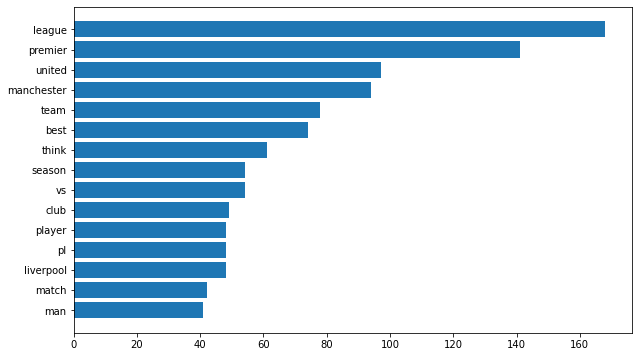

In [53]:
plt.figure(figsize=(10,6))
plt.barh(y=top15_prem_titlewords.sort_values().index, width=top15_prem_titlewords.sort_values());

In [54]:
tomo_titlewords = titles_and_words[titles_and_words['subreddit_x'] == 'Tomorrowland'].drop(columns=['title_x', 'selftext', 
                                                                                                    'subreddit_x', 'created_utc',
                                                                                                    'title_length', 'title_word_count', 
                                                                                                   'which_sub'])
top15_tomo_titlewords = tomo_titlewords.sum().sort_values(ascending=False).head(15)
top15_tomo_titlewords

tomorrowland    250
2021             71
2022             69
tml              69
winter           60
tickets          57
new              36
ticket           34
world            31
global           31
journey          30
package          29
festival         25
nye              25
amp              23
dtype: int64

<BarContainer object of 15 artists>

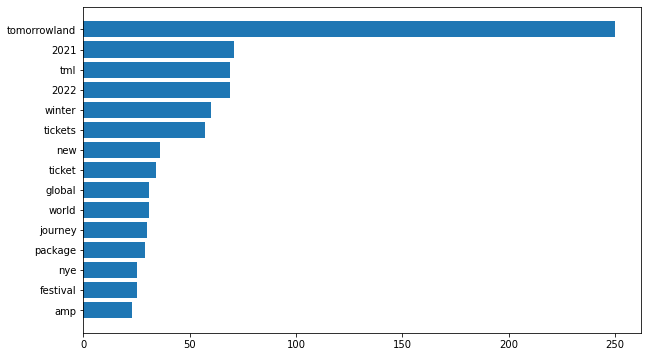

In [55]:
plt.figure(figsize=(10,6))
plt.barh(y=top15_tomo_titlewords.sort_values().index, width=top15_tomo_titlewords.sort_values())

---

# Models

### Model Preparation

In [56]:
df['subreddit'] = df['subreddit'].map({'Tomorrowland': 0, 'PremierLeague': 1})
# target column created

In [57]:
X = df['title']
y = df['subreddit']

In [58]:
y.value_counts(normalize=True)
# baseline accuracy of 50% if predicting subreddit is from Premier League subreddit <- looking to beat this

0    0.5
1    0.5
Name: subreddit, dtype: float64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

---

### Model 1 - KNN with CountVectorizer

In [60]:
pipe1 = Pipeline([
    ('cvec', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [61]:
params1 = {
    'cvec__min_df': [8, 9, 10],
    'cvec__max_df': [.1, .2, .3],
    'cvec__binary': [True, False],
    'cvec__stop_words': [None, 'english'],
    'knn__weights': ['uniform', 'distance']
}

In [62]:
gs1 = GridSearchCV(pipe1, param_grid=params1)
gs1.fit(X_train, y_train)
print(gs1.best_score_)
gs1.best_params_

0.834


{'cvec__binary': False,
 'cvec__max_df': 0.2,
 'cvec__min_df': 9,
 'cvec__stop_words': 'english',
 'knn__weights': 'distance'}

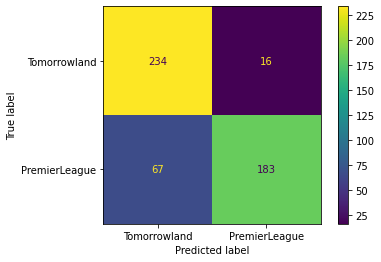

In [64]:
metrics.plot_confusion_matrix(gs1, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [105]:
preds1 = gs1.predict(X_test)
tn1, fp1, fn1, tp1 = metrics.confusion_matrix(y_test, preds1).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland titles?**

In [157]:
tn1 / (tn1 + fp1)

0.936

**Sensitivity - How good did the model perform at predicting Premier League titles?**

In [107]:
tp1 / (tp1 + fn1)

0.732

In [147]:
preds1 = gs1.predict(X_test)
X_test[(y_test != preds1) & (preds1 == 0)].head(60)

1778                           Someone explain this to me
1605                     Online Career Mode - FIFA 22 XB1
1571                      Breakdown of annual squad wages
1024    Ward-prowse, TAA, and Maddison, who are you ta...
1295                              Proper baller. Deserved
1919                       Please subscribe to my channel
1641                                    Pretty much this!
1981                                                Salah
1797                               Heung-min Son or Kane?
1228    A commanding performance or a open-ended thril...
1459    Which are the most unexpected signings in rece...
1574    Word is circulating that managers love it at S...
1062    Anyone else fed up of 3pm games not being tele...
1560        Do you guys have a second team? Who are they?
1290    Former wonder kids who failed to live up to th...
1409                                    I'm fed up of FSG
1317    Seems you lot appreciated the last one I poste...
1074          

In [145]:
X_test[(y_test != preds1) & (preds1 == 1)].head(16)

821    I really hope Martin Garrix features whoever m...
504                            Good luck getting refunds
240                                 Can i still buy tix?
270                                     Change time zone
560    Buy Xanax Online without Prescription for Anxi...
805    The best time of my life deserves to be on my ...
492                          Time to make legal steps...
267    One of the best ways to watch: with Philips Hu...
738            Some of the best memories of my lifetyme!
373    Did your heard about the new electronic versio...
847                                   Good time at B.Eat
64                                    Best treasure case
953                  Can I Watch On IOS ?! (PLEASE HELP)
410    Workin' on my stage Name for 2024. Lmk what yo...
944    When you change the 31.12.2020 timezone, you s...
418            Can I stay the entire week at dreamville?
Name: title, dtype: object

---

### Model 2 - KNN with TFIDF

In [69]:
pipe2 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [70]:
params2 = {
    'knn__n_neighbors': [6, 7, 8],
    'tvec__stop_words': ['english', None],
    'tvec__min_df': [8, 9, 10, 11, 12],
    'tvec__max_df': [.1, .2, .3, .4],
    'tvec__ngram_range': [(1,1), (1,2)]
}

In [71]:
gs2 = GridSearchCV(pipe2, param_grid=params2)
gs2.fit(X_train, y_train)
print(gs2.best_score_)
gs2.best_params_

0.8460000000000001


{'knn__n_neighbors': 7,
 'tvec__max_df': 0.2,
 'tvec__min_df': 10,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

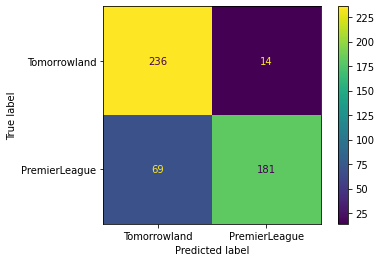

In [73]:
metrics.plot_confusion_matrix(gs2, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [109]:
preds2 = gs2.predict(X_test)
tn2, fp2, fn2, tp2 = metrics.confusion_matrix(y_test, preds2).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland titles?**

In [119]:
tn2 / (tn2 + fp2)

0.944

**Sensitivity - How good did the model perform at predicting Premier League titles?**

In [120]:
tp2 / (tp2 + fn2)

0.724

In [121]:
preds2 = gs2.predict(X_test)
X_test[(y_test != preds2) & (preds2 == 0)].head(60)

1370     Is it just me or is football becoming a bit dead
1778                           Someone explain this to me
1605                     Online Career Mode - FIFA 22 XB1
1571                      Breakdown of annual squad wages
1024    Ward-prowse, TAA, and Maddison, who are you ta...
1295                              Proper baller. Deserved
1919                       Please subscribe to my channel
1641                                    Pretty much this!
1981                                                Salah
1333    I've rewatched the Chelsea-Tottenham game back...
1038                        Are fan channels independent?
1797                               Heung-min Son or Kane?
1228    A commanding performance or a open-ended thril...
1459    Which are the most unexpected signings in rece...
1574    Word is circulating that managers love it at S...
1062    Anyone else fed up of 3pm games not being tele...
1560        Do you guys have a second team? Who are they?
1724          

In [148]:
X_test[(y_test != preds2) & (preds2 == 1)].head(14)

686    Let's gooooo!!!! Finally something to look for...
794               Every day I try not to think about TML
890           Is it possible to watch (share)the relive?
805    The best time of my life deserves to be on my ...
492                          Time to make legal steps...
267    One of the best ways to watch: with Philips Hu...
725    My next Tomorrowland is gonna be my Number 10,...
738            Some of the best memories of my lifetyme!
21     In light of the Astroworld tragedy, can we ple...
339    Anyone Know what camping is dis? I've never se...
64                                    Best treasure case
944    When you change the 31.12.2020 timezone, you s...
418            Can I stay the entire week at dreamville?
561    [OFFER] 20€ FOR YOU + 20€ FOR YOUR FRIEND! (MA...
Name: title, dtype: object

---

### Model 3 - Logistic Regression with CountVectorizer

In [74]:
pipe3 = Pipeline([
    ('cvec', CountVectorizer()),
    ('logreg', LogisticRegression())
])

In [75]:
params3 = {
    'cvec__min_df': [2, 3, 4, 5, 6],
    'cvec__max_df': [.1, .2, .3],
    'cvec__binary': [True, False],
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1,1), (1,2)],
    'logreg__C': [1, 2, 3]
}

In [76]:
gs3 = GridSearchCV(pipe3, param_grid=params3)
gs3.fit(X_train, y_train)
print(gs3.best_score_)
gs3.best_params_

0.898


{'cvec__binary': False,
 'cvec__max_df': 0.2,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'logreg__C': 2}

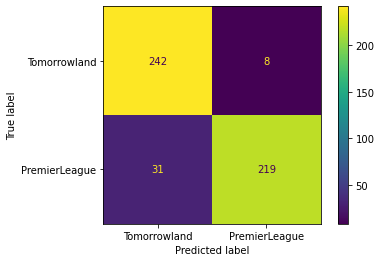

In [78]:
metrics.plot_confusion_matrix(gs3, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [113]:
preds3 = gs3.predict(X_test)
tn3, fp3, fn3, tp3 = metrics.confusion_matrix(y_test, preds3).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland titles?**

In [122]:
tn3 / (tn3 + fp3)

0.968

**Sensitivity - How good did the model perform at predicting Premier League titles?**

In [128]:
tp3 / (tp3 + fn3)

0.876

In [134]:
preds3 = gs3.predict(X_test)
X_test[(y_test != preds3) & (preds3 == 0)].head(31)

1778                           Someone explain this to me
1605                     Online Career Mode - FIFA 22 XB1
1024    Ward-prowse, TAA, and Maddison, who are you ta...
1295                              Proper baller. Deserved
1919                       Please subscribe to my channel
1641                                    Pretty much this!
1228    A commanding performance or a open-ended thril...
1459    Which are the most unexpected signings in rece...
1290    Former wonder kids who failed to live up to th...
1409                                    I'm fed up of FSG
1317    Seems you lot appreciated the last one I poste...
1954                                         Need a chant
1214                             Can someone explain ffp?
1626                                     Pure masterclass
1136             Reece James or Trent Alexander Arnold???
1004    Hwang Hee-chan: Had a chat with Shin Joo-hyun ...
1328                           God I love Moyes's Westham
1668          

In [149]:
X_test[(y_test != preds3) & (preds3 == 1)].head(8)

686    Let's gooooo!!!! Finally something to look for...
805    The best time of my life deserves to be on my ...
492                          Time to make legal steps...
267    One of the best ways to watch: with Philips Hu...
339    Anyone Know what camping is dis? I've never se...
847                                   Good time at B.Eat
64                                    Best treasure case
418            Can I stay the entire week at dreamville?
Name: title, dtype: object

---

### Model 4 - Logistic Regression with TFIDF

In [79]:
pipe4 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('logreg', LogisticRegression())
])

In [80]:
params4 = {
    'tvec__stop_words': [None, 'english'],
    'tvec__min_df': [1, 2, 3, 4, 5],
    'tvec__max_df': [.2, .3, .4],
    'tvec__ngram_range': [(1,1), (1,2)],
    'logreg__C': [1, 2, 3]
}

In [81]:
gs4 = GridSearchCV(pipe4, param_grid=params4)
gs4.fit(X_train, y_train)
print(gs4.best_score_)
gs4.best_params_

0.9113333333333333


{'logreg__C': 1,
 'tvec__max_df': 0.2,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': 'english'}

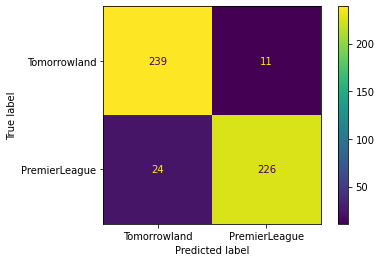

In [83]:
metrics.plot_confusion_matrix(gs4, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [114]:
preds4 = gs4.predict(X_test)
tn4, fp4, fn4, tp4 = metrics.confusion_matrix(y_test, preds4).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland titles?**

In [123]:
tn4 / (tn4 + fp4)

0.956

**Sensitivity - How good did the model perform at predicting Premier League titles?**

In [129]:
tp4 / (tp4 + fn4)

0.904

In [135]:
preds4 = gs4.predict(X_test)
X_test[(y_test != preds4) & (preds4 == 0)].head(24)

1778                           Someone explain this to me
1295                              Proper baller. Deserved
1919                       Please subscribe to my channel
1641                                    Pretty much this!
1228    A commanding performance or a open-ended thril...
1290    Former wonder kids who failed to live up to th...
1409                                    I'm fed up of FSG
1317    Seems you lot appreciated the last one I poste...
1214                             Can someone explain ffp?
1626                                     Pure masterclass
1328                           God I love Moyes's Westham
1668                        I made this on the glowforge.
1843                                            Transfers
1083    Study abroad student wanting to experience the...
1458    According to statistics from Artificial Intell...
1897    American with a ticket question- How to get ti...
1401                       Anybody need a new goalkeeper?
1348          

In [150]:
X_test[(y_test != preds4) & (preds4 == 1)].head(11)

981                                  Talk about details!
805    The best time of my life deserves to be on my ...
492                          Time to make legal steps...
267    One of the best ways to watch: with Philips Hu...
738            Some of the best memories of my lifetyme!
339    Anyone Know what camping is dis? I've never se...
847                                   Good time at B.Eat
64                                    Best treasure case
387                                           It arrived
624                               Most memorable speech?
418            Can I stay the entire week at dreamville?
Name: title, dtype: object

---

### Model 5 - Decision Tree with CountVectorizer

In [84]:
pipe5 = Pipeline([
    ('cvec', CountVectorizer()),
    ('dt', DecisionTreeClassifier())
])

In [85]:
params5 = {
    'cvec__min_df': [2],
    'cvec__max_df': [.2],
    'cvec__binary': [True],
    'cvec__stop_words': ['english'],
    'dt__random_state': [10],
    'dt__min_samples_split': [5, 6, 7, 8, 9, 10]
}

In [86]:
gs5 = GridSearchCV(pipe5, param_grid=params5)
gs5.fit(X_train, y_train)
print(gs5.best_score_)
gs5.best_params_

0.8726666666666667


{'cvec__binary': True,
 'cvec__max_df': 0.2,
 'cvec__min_df': 2,
 'cvec__stop_words': 'english',
 'dt__min_samples_split': 8,
 'dt__random_state': 10}

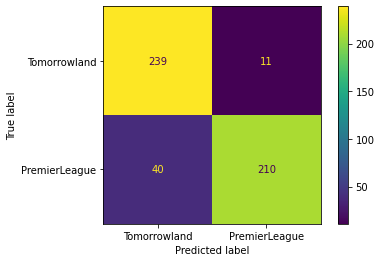

In [88]:
metrics.plot_confusion_matrix(gs5, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [115]:
preds5 = gs5.predict(X_test)
tn5, fp5, fn5, tp5 = metrics.confusion_matrix(y_test, preds5).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland titles?**

In [124]:
tn5 / (tn5 + fp5)

0.956

**Sensitivity - How good did the model perform at predicting Premier League titles?**

In [130]:
tp5 / (tp5 + fn5)

0.84

In [136]:
preds5 = gs5.predict(X_test)
X_test[(y_test != preds5) & (preds5 == 0)].head(40)

1778                           Someone explain this to me
1605                     Online Career Mode - FIFA 22 XB1
1571                      Breakdown of annual squad wages
1024    Ward-prowse, TAA, and Maddison, who are you ta...
1295                              Proper baller. Deserved
1919                       Please subscribe to my channel
1641                                    Pretty much this!
1038                        Are fan channels independent?
1797                               Heung-min Son or Kane?
1228    A commanding performance or a open-ended thril...
1459    Which are the most unexpected signings in rece...
1409                                    I'm fed up of FSG
1317    Seems you lot appreciated the last one I poste...
1074                                      Switching Clubs
1954                                         Need a chant
1928      What is happening at the RED side of Manchester
1214                             Can someone explain ffp?
1536    'Bad, 

In [153]:
X_test[(y_test != preds5) & (preds5 == 1)].head(11)

686    Let's gooooo!!!! Finally something to look for...
805    The best time of my life deserves to be on my ...
987    I have a Week 2 Global Journey Package availab...
267    One of the best ways to watch: with Philips Hu...
738            Some of the best memories of my lifetyme!
339    Anyone Know what camping is dis? I've never se...
645                 La música es vida- The music is life
64                                    Best treasure case
410    Workin' on my stage Name for 2024. Lmk what yo...
418            Can I stay the entire week at dreamville?
561    [OFFER] 20€ FOR YOU + 20€ FOR YOUR FRIEND! (MA...
Name: title, dtype: object

---

### Model 6 - Decision Tree with TFIDF

In [89]:
pipe6 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('dt', DecisionTreeClassifier())
])

In [90]:
params6 = {
    'tvec__stop_words': ['english'],
    'tvec__min_df': [4],
    'tvec__max_df': [.2],
    'tvec__ngram_range': [(1,1)],
    'dt__random_state': [42],
    'dt__min_samples_split': [9]
}

In [91]:
gs6 = GridSearchCV(pipe6, param_grid=params6)
gs6.fit(X_train, y_train)
print(gs6.best_score_)
gs6.best_params_

0.8713333333333333


{'dt__min_samples_split': 9,
 'dt__random_state': 42,
 'tvec__max_df': 0.2,
 'tvec__min_df': 4,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

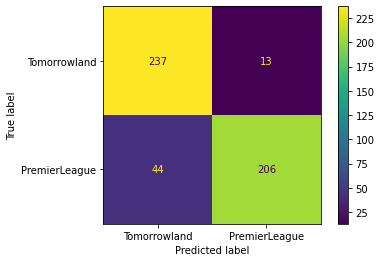

In [94]:
metrics.plot_confusion_matrix(gs6, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [116]:
preds6 = gs6.predict(X_test)
tn6, fp6, fn6, tp6 = metrics.confusion_matrix(y_test, preds6).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland titles?**

In [125]:
tn6 / (tn6 + fp6)

0.948

**Sensitivity - How good did the model perform at predicting Premier League titles?**

In [131]:
tp6 / (tp6 + fn6)

0.824

In [142]:
preds6 = gs6.predict(X_test)
X_test[(y_test != preds6) & (preds6 == 0)].head(44)

1778                           Someone explain this to me
1571                      Breakdown of annual squad wages
1024    Ward-prowse, TAA, and Maddison, who are you ta...
1295                              Proper baller. Deserved
1919                       Please subscribe to my channel
1641                                    Pretty much this!
1797                               Heung-min Son or Kane?
1228    A commanding performance or a open-ended thril...
1459    Which are the most unexpected signings in rece...
1290    Former wonder kids who failed to live up to th...
1409                                    I'm fed up of FSG
1317    Seems you lot appreciated the last one I poste...
1074                                      Switching Clubs
1954                                         Need a chant
1928      What is happening at the RED side of Manchester
1050    A video providing a surface level breakdown of...
1214                             Can someone explain ffp?
1068    How do

In [154]:
X_test[(y_test != preds6) & (preds6 == 1)].head(13)

504                            Good luck getting refunds
982    I get the chills evrytime I find this photo.. ...
805    The best time of my life deserves to be on my ...
276    Cheers from Australia, can't wait to be there ...
267    One of the best ways to watch: with Philips Hu...
389    How it the festival next year safer than that?...
339    Anyone Know what camping is dis? I've never se...
242    Anyone having Streaming Problems with the Replay?
847                                   Good time at B.Eat
410    Workin' on my stage Name for 2024. Lmk what yo...
857                What happened with the Chainsmokers??
418            Can I stay the entire week at dreamville?
241          Thinking about 2022. 12 months and counting
Name: title, dtype: object

---

### Model 7 - RandomForest with CountVectorizer

In [95]:
pipe7 = Pipeline([
    ('cvec', CountVectorizer()),
    ('rf', RandomForestClassifier())
])

In [96]:
params7 = {
    'cvec__min_df': [1, 2],
    'cvec__max_df': [.1, .2],
    'cvec__binary': [False],
    'cvec__stop_words': ['english'],
    'rf__random_state': [42]
}

In [97]:
gs7 = GridSearchCV(pipe7, param_grid=params7)
gs7.fit(X_train, y_train)
print(gs7.best_score_)
gs7.best_params_

0.8846666666666667


{'cvec__binary': False,
 'cvec__max_df': 0.2,
 'cvec__min_df': 1,
 'cvec__stop_words': 'english',
 'rf__random_state': 42}

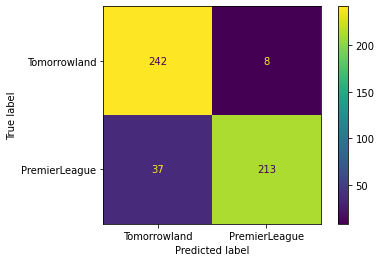

In [99]:
metrics.plot_confusion_matrix(gs7, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [117]:
preds7 = gs7.predict(X_test)
tn7, fp7, fn7, tp7 = metrics.confusion_matrix(y_test, preds7).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland titles?**

In [126]:
tn7 / (tn7 + fp7)

0.968

**Sensitivity - How good did the model perform at predicting Premier League titles?**

In [132]:
tp7 / (tp7 + fn7)

0.852

In [138]:
preds7 = gs7.predict(X_test)
X_test[(y_test != preds7) & (preds7 == 0)].head(37)

1778                           Someone explain this to me
1605                     Online Career Mode - FIFA 22 XB1
1571                      Breakdown of annual squad wages
1024    Ward-prowse, TAA, and Maddison, who are you ta...
1295                              Proper baller. Deserved
1919                       Please subscribe to my channel
1641                                    Pretty much this!
1981                                                Salah
1228    A commanding performance or a open-ended thril...
1459    Which are the most unexpected signings in rece...
1290    Former wonder kids who failed to live up to th...
1409                                    I'm fed up of FSG
1317    Seems you lot appreciated the last one I poste...
1954                                         Need a chant
1214                             Can someone explain ffp?
1536    'Bad, very bad indeed' - Italian media denounc...
1269          Who remembers this classic Redknapp moment?
1626          

In [155]:
X_test[(y_test != preds7) & (preds7 == 1)].head(8)

821    I really hope Martin Garrix features whoever m...
270                                     Change time zone
805    The best time of my life deserves to be on my ...
492                          Time to make legal steps...
267    One of the best ways to watch: with Philips Hu...
847                                   Good time at B.Eat
64                                    Best treasure case
418            Can I stay the entire week at dreamville?
Name: title, dtype: object

---

### Model 8 - RandomForest with TFIDF

In [100]:
pipe8 = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

In [101]:
params8 = {
    'tvec__stop_words': [None, 'english'],
    'tvec__min_df': [1, 2, 3, 4, 5],
    'tvec__max_df': [.2, .3, .4],
    'tvec__ngram_range': [(1,1), (1,2)],
    'rf__random_state': [42]
}

In [102]:
gs8 = GridSearchCV(pipe8, param_grid=params8)
gs8.fit(X_train, y_train)
print(gs8.best_score_)
gs8.best_params_

0.8879999999999999


{'rf__random_state': 42,
 'tvec__max_df': 0.2,
 'tvec__min_df': 1,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': 'english'}

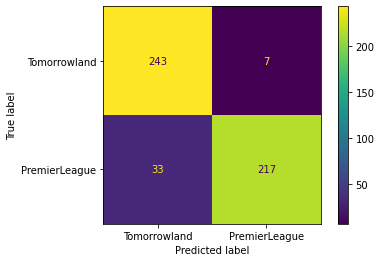

In [104]:
metrics.plot_confusion_matrix(gs8, X_test, y_test, display_labels=['Tomorrowland', 'PremierLeague'])

In [118]:
preds8 = gs8.predict(X_test)
tn8, fp8, fn8, tp8 = metrics.confusion_matrix(y_test, preds8).flatten()

**Specificity - How good did the model perform at predicting Tomorrowland titles?**

In [127]:
tn8 / (tn8 + fp8)

0.972

**Sensitivity - How good did the model perform at predicting Premier League titles?**

In [133]:
tp8 / (tp8 + fn8)

0.868

In [141]:
preds8 = gs8.predict(X_test)
X_test[(y_test != preds8) & (preds8 == 0)].head(33)

1778                           Someone explain this to me
1605                     Online Career Mode - FIFA 22 XB1
1571                      Breakdown of annual squad wages
1024    Ward-prowse, TAA, and Maddison, who are you ta...
1295                              Proper baller. Deserved
1919                       Please subscribe to my channel
1641                                    Pretty much this!
1228    A commanding performance or a open-ended thril...
1459    Which are the most unexpected signings in rece...
1290    Former wonder kids who failed to live up to th...
1409                                    I'm fed up of FSG
1317    Seems you lot appreciated the last one I poste...
1954                                         Need a chant
1214                             Can someone explain ffp?
1269          Who remembers this classic Redknapp moment?
1626                                     Pure masterclass
1253    'I am not sure what the plan is' - why are Eve...
1328          

In [156]:
X_test[(y_test != preds8) & (preds8 == 1)].head(7)

805    The best time of my life deserves to be on my ...
492                          Time to make legal steps...
267    One of the best ways to watch: with Philips Hu...
738            Some of the best memories of my lifetyme!
847                                   Good time at B.Eat
64                                    Best treasure case
418            Can I stay the entire week at dreamville?
Name: title, dtype: object

---